In [22]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [130]:
def simple_unet(input_shape=(128, 128, 3), num_classes=1):
    inputs = layers.Input(shape=input_shape)
    
    # Encoder
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)
    
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)
    
    # Bottleneck
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    
    # Decoder
    u4 = layers.UpSampling2D((2, 2))(c3)
    u4 = layers.concatenate([u4, c2])
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u4)
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c4)
    
    u5 = layers.UpSampling2D((2, 2))(c4)
    u5 = layers.concatenate([u5, c1])
    c5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u5)
    c5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c5)
    
    outputs = layers.Conv2D(num_classes, (1, 1), activation='sigmoid')(c5)
    
    model = Model(inputs, outputs)
    return model

model = simple_unet()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_46 (InputLayer)   │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_506 (Conv2D)           │ (None, 128, 128, 64)      │           1,792 │ input_layer_46[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_507 (Conv2D)           │ (None, 128, 128, 64)      │          36,928 │ conv2d_506[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_92              │ (None, 64, 64, 64)        │               0 │ conv2d_507[0][0]           │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_508 (Conv2D)           │ (None, 64, 64, 128)       │          73,856 │ max_pooling2d_92[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_509 (Conv2D)           │ (None, 64, 64, 128)       │         147,584 │ conv2d_508[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_93              │ (None, 32, 32, 128)       │               0 │ conv2d_509[0][0]           │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_510 (Conv2D)           │ (None, 32, 32, 256)       │         295,168 │ max_pooling2d_93[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_511 (Conv2D)           │ (None, 32, 32, 256)       │         590,080 │ conv2d_510[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ up_sampling2d_92              │ (None, 64, 64, 256)       │               0 │ conv2d_511[0][0]           │
│ (UpSampling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_92 (Concatenate)  │ (None, 64, 64, 384)       │               0 │ up_sampling2d_92[0][0],    │
│                               │                           │                 │ conv2d_509[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_512 (Conv2D)           │ (None, 64, 64, 128)       │         442,496 │ concatenate_92[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_513 (Conv2D)           │ (None, 64, 64, 128)       │         147,584 │ conv2d_512[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ up_sampling2d_93              │ (None, 128, 128, 128)     │               0 │ conv2d_513[0][0]           │
│ (UpSampling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_93 (Concatenate)  │ (None, 128, 128, 192)     │               

 Total params: 1,883,137 (7.18 MB)

 Trainable params: 1,883,137 (7.18 MB)

 Non-trainable params: 0 (0.00 B)

In [131]:
def segment_image(image_path, model):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_resized = cv2.resize(image, (128, 128)) / 255.0
    image_input = np.expand_dims(image_resized, axis=0)
    
    prediction = model.predict(image_input)[0, :, :, 0]
    prediction_resized = cv2.resize(prediction, (image.shape[1], image.shape[0]))
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.imshow(prediction_resized, cmap='gray')
    plt.title("Segmented Output")
    plt.axis("off")
    
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


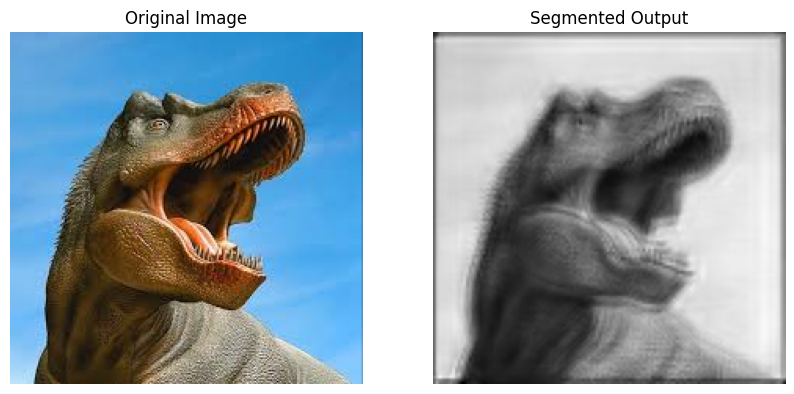

In [132]:
segment_image("C:/Users/AI_LAB/Downloads/images.jpg", model)